In [2]:
import pandas as pd
import os
import networkx as nx
import numpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import math
import matplotlib as mpl
import scipy

In [4]:
from scipy.optimize import curve_fit
import numpy as np

def linear_fun(x, a, b):
    return a * np.asarray(x) + b

def fitting_powerlaw(x, y ,x_line,base):
    #base=10
    popt, cov = curve_fit(linear_fun, np.log(x+0.000001)/np.log(base), np.log(y+0.000001)/np.log(base))
    a, b = popt
    y_line = linear_fun(np.log(x_line+0.000001)/np.log(base), a, b)
    y_line = np.power(base, y_line)

    return a, b, x_line, y_line

def fitting_linear(x, y):
    #base=10
    popt, cov = curve_fit(linear_fun, x, y)
    a, b = popt
    y_line = linear_fun(x, a, b)

    return a, b, x, y_line

In [6]:
def set_fig_style(ax1, xlabel,ylabel,ratio):
    labelfont  = 14*ratio
    tickfont   = 14*ratio
    #tickfont   = 10*ratio
    legendfont = 14*ratio
    ax1.tick_params(axis='both', which='both', direction="in", labelsize=tickfont, pad=8 )
    for tick in ax1.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)
    for tick in ax1.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)

    ax1.set_xlabel(xlabel, fontsize=labelfont, labelpad=labelfont )
    ax1.set_ylabel(ylabel,fontsize=labelfont, labelpad=labelfont )
    #ax1.legend(loc='upper right', fontsize=legendfont, frameon=False)

    #ax1.spines.right.set_visible(False)
    #ax1.spines.top.set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

In [8]:
def dc_VS_rc(df_list,label_list,dis_r,show_fitting,path_figure):
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.7))
    base=10
    for df, label_str, show  in zip(df_list, label_list, show_fitting):
        df_data = copy.deepcopy(df)
        
        df_data = df_data[(df_data['d_home'] >=1) & (df_data['d_home'] <= dis_r)]
      
        df_data['d_home'] = list(map(lambda x: math.pow(base, int(math.log10(x)/0.2)*0.2), df_data['d_home']))
        df_data1 = df_data.groupby(['d_home'])['radius'].mean().reset_index() 

        if show == True:
            x_line = np.arange(dis_r)
            a1, b1, xline, yline = fitting_powerlaw(df_data1['d_home'], df_data1['radius'], x_line,
                                                          base=base)

            ax.scatter(df_data1['d_home'], df_data1['radius'], s=50, marker='o', color='black', label=label_str,zorder=1)
            ax.plot(xline, yline, '-',color='r',alpha=0.25,linewidth=5, zorder=0, label=r'${r_c}\sim {d_c}^{%s}$'%round(a1,2))
            print('slope',a1,b1)
            
        ax.set_xlim(1, dis_r*1.1)
        #sprint(np.min(yline), np.max(yline))
        ax.set_ylim(1, np.max(yline)*1.1)

    set_fig_style(ax, 'Distance from home (km), '+r'$d_c$','Module radius (km), '+ r'$r_c$',1)
    ax.legend(loc='upper left', fontsize=12, frameon=False)
    ax.set_xscale('log')  #
    ax.set_yscale('log')  #
    
    #import matplotlib as mpl
    
    mpl.rcParams['pdf.fonttype']=42
    plt.savefig(path_figure,bbox_inches='tight',dpi=600)
    return a1

In [10]:
def dc_VS_Areac(df_list,label_list,dis_r,show_fitting,path_figures):
    base=10
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.7))

    for df, label_str, show  in zip(df_list, label_list,show_fitting):
        df_data = copy.deepcopy(df)
        
        df_data = df_data[(df_data['d_home'] >=1) & (df_data['d_home'] <= dis_r)]
        df_data['d_home'] = list(map(lambda x: math.pow(base, int(math.log10(x)/0.2)*0.2), df_data['d_home']))
        df_data1 = df_data.groupby(['d_home'])['area'].mean().reset_index()

        if show == True:
            a1, b1, xline, yline = fitting_powerlaw(df_data1['d_home'], df_data1['area'],  np.arange(1,dis_r),
                                                          base=base)
            
            ax.scatter(df_data1['d_home'], df_data1['area'], s=50, marker='o', color='black', label=label_str,zorder=1)
            ax.plot(xline, yline, '-',linewidth=5,alpha=0.25,color='#e41a1c',zorder=0, label=r'${A_c}\sim {d_c}^{%s}$'%round(a1,2))
            
            print('slope',a1,b1)
        
        ax.set_xlim(1, dis_r)
        #ax.set_ylim(np.min(yline), np.max(yline)*1.1)

    

    set_fig_style(ax, 'Distance from home (km), '+r'$d_c$','Convex hull area size, '+ r'$A_c$',1)
    ax.legend(loc='upper left', fontsize=12, frameon=False)
    ax.set_xscale('log')  #
    ax.set_yscale('log')  #
    ax.set_ylim(0.1,20)
    plt.tight_layout()
    fig.savefig(path_figures, dpi=600)

In [12]:
def dc_VS_S_num(df_list,label_list,dis_r,show_fitting,path_figures):
    base=10
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.7))

    for df, label_str, show  in zip(df_list, label_list,show_fitting):
        df_data = copy.deepcopy(df)
        
        df_data = df_data[(df_data['d_home'] >=1) & (df_data['d_home'] <= dis_r)]
        df_data['d_home'] = list(map(lambda x: math.pow(base, int(math.log10(x)/0.2)*0.2), df_data['d_home']))
      
        df_data1 = df_data.groupby(['d_home'])['#unique_loc'].mean().reset_index()

        if show == True:
            a1, b1, xline, yline = fitting_powerlaw(df_data1['d_home'], df_data1['#unique_loc'],  np.arange(1,dis_r),
                                                          base=base)

            ax.scatter(df_data1['d_home'], df_data1['#unique_loc'], s=40, marker='o', color='black', label=label_str,zorder=1)
            #ax.plot(xline, yline, '-',color='#e41a1c',alpha=0.5,linewidth=2, zorder=0, label='slope='+str(round(a1,2)))
            print('slope',a1,b1)
        
        ax.set_xlim(1, dis_r)
        ax.set_ylim(np.min(yline), np.max(yline))
       
    

    set_fig_style(ax, 'Distance from home (km), '+r'$d_c$','Locations within module',1)
    ax.legend(loc='upper left', fontsize=12, frameon=False)
    ax.set_xscale('log')  #
    #ax.set_yscale('log')  #
    #ax.set_ylim(5,15)
    ax.set_ylim(0,20)
    plt.tight_layout()
    fig.savefig(path_figures, dpi=600)

In [14]:
def dc_VS_n_num(df_list,label_list,dis_r,show_fitting,path_figures):
    base=10
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.7))

    for df, label_str, show  in zip(df_list, label_list,show_fitting):
        df_data = copy.deepcopy(df)
        
        df_data = df_data[(df_data['d_home'] >=1) & (df_data['d_home'] <= dis_r)]
        df_data['d_home'] = list(map(lambda x: math.pow(base, int(math.log10(x)/0.2)*0.2), df_data['d_home']))
        df_data1 = df_data.groupby(['d_home'])['#move'].mean().reset_index()
        
        if show == True:
            a1, b1, xline, yline = fitting_powerlaw(df_data1['d_home'], df_data1['#move'],  np.arange(1,dis_r),
                                                          base=base)

            ax.scatter(df_data1['d_home'], df_data1['#move'], s=40, marker='o', color='black', label=label_str,zorder=1)
            #ax.plot(xline, yline, '-',color='#e41a1c',alpha=0.5,linewidth=2, zorder=0, label='slope='+str(round(a1,2)))
            print('slope',a1,b1)

        ax.set_xlim(1, dis_r)
        ax.set_ylim(np.min(yline), np.max(yline))

    

    set_fig_style(ax, 'Distance from home (km), '+r'$d_c$','Travels within modules',1)
    ax.legend(loc='upper left', fontsize=12, frameon=False)
    ax.set_xscale('log')  #
    #ax.set_yscale('log')  #
    ax.set_ylim(10,60)
    plt.tight_layout()
    fig.savefig(path_figures, dpi=600)

In [16]:
def dc_VS_f(df_list,label_list,dis_r,show_fitting,path_figures):
    base=10
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.7))

    for df, label_str, show  in zip(df_list, label_list,show_fitting):
        df_data = copy.deepcopy(df)
        
        df_data = df_data[(df_data['d_home'] >=1) & (df_data['d_home'] <= dis_r)]
        df_data['d_home'] = list(map(lambda x: math.pow(base, int(math.log10(x)/0.2)*0.2), df_data['d_home']))
        df_data1 = df_data.groupby(['d_home'])['frequency'].mean().reset_index()

        if show == True:
            a1, b1, xline, yline = fitting_powerlaw(df_data1['d_home'], df_data1['frequency'],  np.arange(1,dis_r),
                                                          base=base)

            ax.scatter(df_data1['d_home'], df_data1['frequency'], s=40, marker='o', color='black', label=label_str,zorder=1)
            ax.plot(xline, yline, '-',color='#e41a1c',alpha=0.4,linewidth=4, zorder=0, label='slope='+str(round(a1,2)))
            print('slope',a1,b1)

        ax.set_xlim(1, 4000)
        ax.set_ylim(np.min(yline), np.max(yline))

    

    set_fig_style(ax, 'Distance from home (km), '+r'$d_c$','Visit frequency (module)',1)
    ax.legend(loc='upper left', fontsize=12, frameon=False)
    ax.set_xscale('log')  #
    ax.set_yscale('log')  #
    ax.set_ylim(1,20)
    plt.tight_layout()
    fig.savefig(path_figures, dpi=600)

# Load Results and Plot Figures

slope 0.4241933015056859 0.4607017487969961
slope 0.36005798474175776 -0.7625694789366226


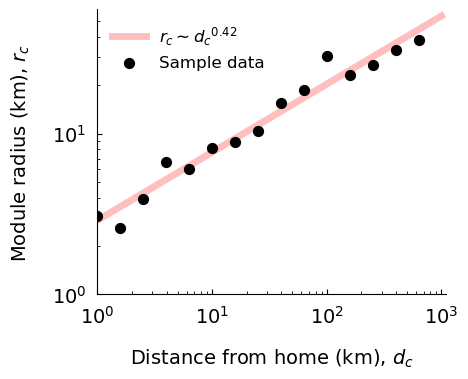

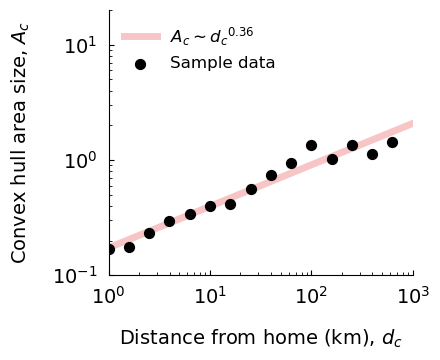

In [37]:
df_sample=pd.read_csv('sample_reuslts/results_cluster_log_weight_Louvain.csv')
###sampled dataset is not what we used in manuscript

dc_VS_rc([df_sample],['Sample data'],1000,[True],'sample_reuslts/d_r.png')

dc_VS_Areac([df_sample],['Sample data'],1000,[True], 'sample_reuslts/d_Area_community.png')



slope -0.23239195052662967 0.8916563488269856


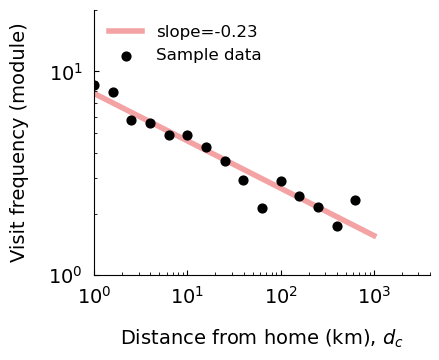

In [39]:
dc_VS_f([df_sample],['Sample data'],1000,[True],'sample_reuslts/d_f_community.png')

slope -0.04416303857306692 0.9877162376666424
slope -0.1409938982778877 1.6735725573413411


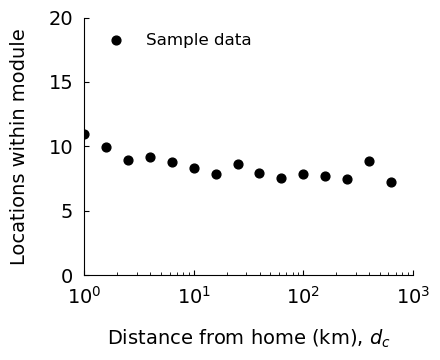

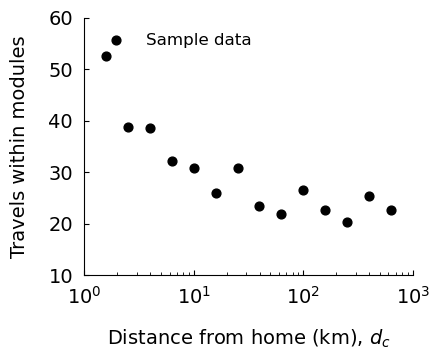

In [41]:

dc_VS_S_num([df_sample],['Sample data'],1000,[True], 'sample_reuslts/d_S_community.png')

dc_VS_n_num([df_sample],['Sample data'],1000,[True],'sample_reuslts/d_n_community.png')

